%matplotlib inline

# Connecting primaries and secondaries

Primary and secondaries are connected with each other.
Binaries detected are only included if none of them is in the binaryinfo.csv file. As presence of one of the component of the system means that is has already been detected as the binary. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fxn
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

*Primary_matches.csv* contain all primary sources that hasbeen found using Algorithm and *secondary_matches.csv* contain all secondary sources. 
*not_in_basic.csv* contain all sources that are not found in the *basicinto.csv*


In [3]:
primary = pd.read_csv("Primary_matches.csv")
secondary = pd.read_csv("secondary_matches.csv")
new = pd.read_csv("not_in_basic.csv")
basic_info = pd.read_csv("in_basic.csv")

In [3]:
print(len(new))
print(len(basic_info))

329
157


In [3]:
new_match = []
source = [(basic_info.iloc[i]['SHORTNAME']).strip()
         for i in range(len(basic_info))]
for i in range(len(primary)):
    objects = []
    a = primary.iloc[i]["SHORTNAME"]
    a = a.strip()
    objects.append(a)
    secondary_list = fxn.Converttolist(primary.iloc[i]['COMPANIONS'])
    objects.extend(secondary_list)
    for j in objects:
        if j in source:
            break
        else:
            new_match.append(a)
new_match = set(new_match)
len(new_match)

162

In [4]:
basic = []
for i in range(len(new)):
    if new.iloc[i]['SHORTNAME'] in new_match:
        basic.append(new.iloc[i]['SHORTNAME'])
basic = set(basic)
len(basic)

161

In [4]:
data = pd.read_csv("new_objects.csv")
data = data[data['GAIATOG'] > 0] 
len(data)

160

In [5]:
new_objects = []
for i in range(len(primary)):
    a = primary.iloc[i]['SHORTNAME'].strip()
    if a in basic:
        new_objects.append(primary.iloc[i,:].values)
new_objects = pd.DataFrame(new_objects, columns = primary.columns)
new_objects["ABSmag"] = new_objects['GAIAG'] + (5*np.log10(new_objects['PARALLAX']/100.))
new_objects["GAIA_GR"] = new_objects['GAIAG'] - new_objects['GAIARP']
new_objects.to_csv("new_objects.csv", sep = ",")

In [5]:
new_objects = pd.read_csv('new_objects.csv')
secondary_obj = []
for i in range(len(new_objects)):
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for i in range(len(secondary)):
        if secondary.iloc[i]['SHORTNAME'].strip() in sec_obj:
            secondary_obj.append(secondary.iloc[i,:].values)
secondary_obj = pd.DataFrame(secondary_obj, columns = secondary.columns)
secondary_obj["ABSmag"] = secondary_obj['GAIAG'] + (5*np.log10(secondary_obj['PARALLAX']/100.))
secondary_obj["GAIA_GR"] = secondary_obj['GAIAG'] - secondary_obj['GAIARP']
secondary_obj.to_csv("new_secondary.csv", sep =',')

In [7]:
all_master = pd.read_csv("matched_dr3.csv")

In [6]:
cone = pd.read_csv('cone.csv')


In [7]:

cone["ABSmag"] = cone['GAIAG'] + (5*np.log10(cone['PARALLAX']/100.))
cone["GAIA_GR"] = cone['GAIAG'] - cone['GAIARP']
cone.sort_values(by = 'ipd_frac_multi_peak', ascending = True)

/home/alok/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SHORTNAME,DISCOVERYNAME,DISCOVERYREFNAME,RA,DEC,POSITIONREFNAME,POSITIONEPOCH,PECULIARNAME,PECULIARREFNAME,MGCANDIDACYNAME,...,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,Separation,ABSmag,GAIA_GR
0,J0000+2554,2MASS00001354+2554180,2004AJ....127.3553K,0.056354,25.905569,2006AJ....131.1163S,2016.0,...,...................,...:...,...,NaN,NaN,NaN,108.749749,-35.551850,10.984560,23.608567,4.906431e-07,20.630466,1.7357
7316,J1339+2800,2MASSJ13393256+2800489,From_Simbad........,204.885490,28.013703,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,40.453875,79.307358,190.885923,35.359211,2.423444e-06,10.786586,1.3012
7317,J1339+5640,...,2008AJ....135..785W,204.938590,56.673112,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,109.948398,59.220584,166.476620,59.176581,2.492075e-06,13.056763,1.2542
7319,J1340+6007,...,2008AJ....135..785W,205.173740,60.119352,...................,2016.0,...,...................,...,...,NaN,NaN,NaN,111.992787,55.950475,161.544666,61.619627,6.653250e-07,NaN,1.6860
7321,J1340+5703,...,2008AJ....135..785W,205.190810,57.066304,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,109.978272,58.804215,166.122280,59.552078,2.284725e-06,14.034940,1.4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,J0512+2253,GaiaDR23415706130944329216,From_Simbad........,78.114951,22.896915,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,180.965694,-9.541434,79.063475,-0.092281,5.576418e-07,7.054317,1.4532
8033,J1429+4946,...,2008AJ....135..785W,217.389720,49.775272,...................,2016.0,...,...................,...,...,NaN,NaN,NaN,89.853842,60.577295,186.237095,58.925796,5.092478e-05,NaN,2.1350
11003,J2240+0532,2MASSJ22400144+0532162,2015ApJS..219...33G,340.006540,5.537234,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,73.796978,-44.439895,343.680934,12.938237,1.806175e-06,13.130278,1.7711
1208,J0419+2827,V*FRTau,From_Simbad........,64.897792,28.455964,GDR3,2016.0,...,...................,...,...,NaN,NaN,NaN,168.877084,-15.310587,67.931411,6.919567,3.901259e-07,9.385801,1.7910


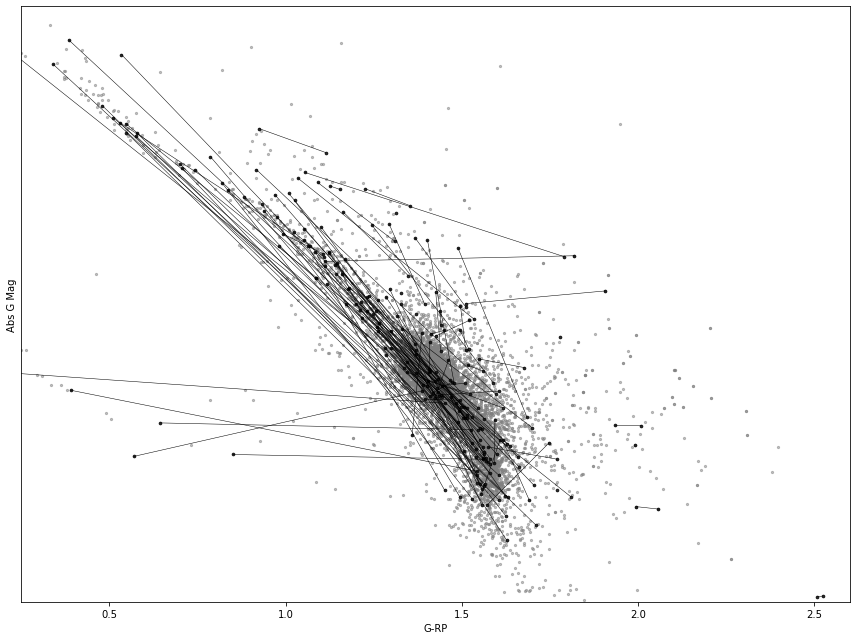

In [17]:
plt.figure(figsize=(12,9))

cone = cone[cone['GAIATOG'] >0]
secondary_obj = secondary_obj[secondary_obj['GAIATOG']>0]
plt.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.5, s= 5)

for i in range(len(new_objects)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(secondary_obj)):
        if secondary_obj.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_objects.iloc[i]['ABSmag'])
            absG.append(secondary_obj.iloc[j]['ABSmag'])
            G_R.append(new_objects.iloc[i]['GAIA_GR'])
            G_R.append(secondary_obj.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, color = 'black', linestyle = '-', linewidth = 0.5, label = 'Binary System')
    plt.scatter(G_R,absG, color= 'black', alpha = 0.75, s = 7)


#plt.scatter(sec_GR, sec_abs, color = 'grey', alpha = 0.5, s= 5)


plt.xlabel("G-RP")
plt.ylabel("Abs G Mag")
plt.xlim(0.25, 2.6)
plt.ylim(1.25,20.6)
plt.plot('All possible candidate with their companion')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("All_binary.png")
plt.show()

0 10.530770238634764
0 [13.147017451842995, 14.298030638925786] [1.4064000000000014, 1.5157000000000025]
1 9.248874668515944
1 [5.058606029334321, 14.293237430860732] [0.5465400000000002, 1.5449999999999982]
2 14.084307086659786
2 [10.422012563796601, 13.582531074043047] [1.1768999999999998, 1.401299999999999]
4 23.5714513948844
4 [9.590095058678875, 11.11540367844184] [1.1456199999999992, 1.210329999999999]
7 0.10215132838578678
7 [14.863156003391602, 14.870684556293634] [1.9358000000000004, 2.009499999999999]
8 -33.05015611230468
8 [15.3270160670509, 17.091894403447967] [1.6088999999999984, 1.5554999999999986]
9 nan
9 [11.23365113320476, 12.487433689205986] [1.3697000000000017, nan]
10 13.033238395695335
10 [11.158481999771684, 13.882428824472004] [1.2311999999999994, 1.440199999999999]
12 25.74360739840066
12 [15.345293028418425, 17.283786665517958] [1.6155000000000008, 1.6907999999999994]
13 -0.7797790762455699
13 [13.7498499347159, 13.901361009230413] [1.6050000000000004, 1.410700

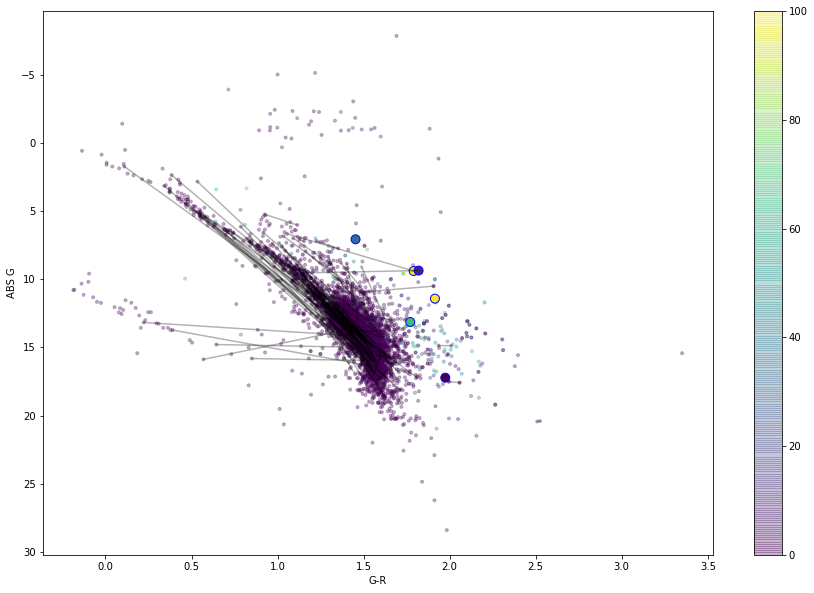

In [9]:
new_objects = new_objects[new_objects['GAIATOG'] > 0]
secondary_obj = secondary_obj[secondary_obj['GAIATOG'] > 0]

plt.figure(figsize=(15,10))
for i in range(len(new_objects)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(secondary_obj)):
        if secondary_obj.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_objects.iloc[i]['ABSmag'])
            absG.append(secondary_obj.iloc[j]['ABSmag'])
            G_R.append(new_objects.iloc[i]['GAIA_GR'])
            G_R.append(secondary_obj.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, "black", alpha = 0.3)

#plt.scatter(new_objects['GAIA_GR'], new_objects['ABSmag'],  label = 'PRIMARY')
#plt.scatter(secondary_obj['GAIA_GR'], secondary_obj['ABSmag'], label = 'SECONDARY')
plt.scatter(cone["GAIA_GR"] , cone["ABSmag"], 
        alpha =0.3, marker = '.', c = cone['ipd_frac_multi_peak'])
plt.colorbar()
plt.gca().invert_yaxis()
cone_idp = cone[cone['ipd_frac_multi_peak'] > 80]
plt.scatter(cone_idp["GAIA_GR"] , cone_idp["ABSmag"],
        facecolor = 'none', edgecolor = "blue", s = 80, c = cone_idp['ipd_frac_multi_peak'])
plt.xlabel("G-R")
plt.ylabel("ABS G")
plt.show()

In [22]:
import plotly.graph_objects as go

new_objects = new_objects[new_objects['GAIATOG'] > 0]
secondary_obj = secondary_obj[secondary_obj['GAIATOG'] > 0]

fig = go.Figure()

fig.add_trace(go.Scatter(x = cone["GAIA_GR"], y = cone["ABSmag"],
                        mode  = "markers"))

cone_idp = cone[cone['ipd_frac_multi_peak'] > 80]
fig.add_trace(go.Scatter(x =cone_idp["GAIA_GR"], y = cone_idp["ABSmag"],
                        mode = "markers"))


for i in range(len(new_objects)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(secondary_obj)):
        if secondary_obj.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_objects.iloc[i]['ABSmag'])
            absG.append(secondary_obj.iloc[j]['ABSmag'])
            G_R.append(new_objects.iloc[i]['GAIA_GR'])
            G_R.append(secondary_obj.iloc[j]['GAIA_GR'])
    fig.add_trace(go.Scatter( x = G_R, y = absG, mode = "lines"))
#plt.scatter(new_objects['GAIA_GR'], new_objects['ABSmag'],  label = 'PRIMARY')
#plt.scatter(secondary_obj['GAIA_GR'], secondary_obj['ABSmag'], label = 'SECONDARY')

fig.update_layout(title = "G-R vs AbsGmag", 
                xaxis_title = "G-R", 
                yaxis_title = "AbsG mag",
                autosize=False,
                width=2000,  height=2000)
fig.update_xaxes(range=[-0.5, 3.5])
fig.update_yaxes(range=[-10, 30])
fig.update_yaxes(autorange="reversed")
fig.show(renderer = "browser")


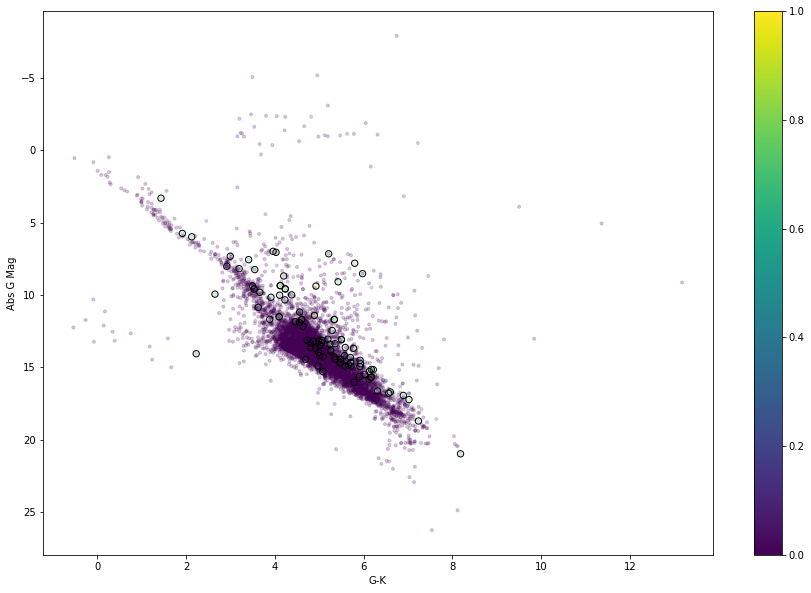

In [23]:
plt.figure(figsize=(15,10))

cone1 = cone[cone["TMASSJ"] > 0]
cone1 = cone1[cone1["TMASSK"] > 0]
j_kmag = cone1["GAIAG"]-cone1["TMASSK"]
plt.scatter( j_kmag, cone1["ABSmag"],
        alpha = 0.2, marker = '.', c = cone1['ipd_frac_multi_peak'])
cone_idp = cone1[cone1['ipd_frac_multi_peak'] > 30]
j_Kmag_idp = cone_idp["GAIAG"]-cone_idp["TMASSK"]
plt.scatter(j_Kmag_idp , cone_idp["ABSmag"],
        facecolor = 'none', edgecolors= 'black', s = 40)
plt.colorbar()
plt.xlabel("G-K")
plt.ylabel("Abs G Mag")
plt.gca().invert_yaxis()
plt.show()

In [24]:
obj_idp = pd.read_csv("new_objects_idp.csv")
obj_idp = obj_idp[obj_idp['NUMCOMPANION'] == 1]
master = pd.read_csv('Master_withDR3.csv')
sep_binary=[]
for i in range(len(obj_idp)):
    sep=[]
    ra = obj_idp.iloc[i]['RA_1']
    dec = obj_idp.iloc[i]['DEC_1']
    radius = 1.
    filter = master['RA'] > (ra - radius/np.cos(dec*np.pi/180))  
    filter &= master['RA'] < (ra + radius/np.cos(dec*np.pi/180))
    filter &= master['DEC'] > (dec - radius)            
    filter &= master['DEC'] < (dec + radius)            
    data3 = master[filter]         
    
    
    c1 = SkyCoord(ra = obj_idp.iloc[i]['RA_1']*u.deg, 
                dec = obj_idp.iloc[i]['DEC_1']*u.deg)
    
    candid = obj_idp.iloc[i]["COMPANIONS"]
    
    for j in range(len(data3)):
        if (data3.iloc[j]['SHORTNAME']).strip() == candid:
            c2= SkyCoord(ra=data3.iloc[j]['RA']*u.deg,dec= data3.iloc[j]['DEC']*u.deg)
            dist=c1.separation(c2)
            distarcsec= dist.arcsecond
            sep.append(distarcsec)
            sep_binary.append(distarcsec)
        
obj_idp['Sep_binary'] = sep_binary

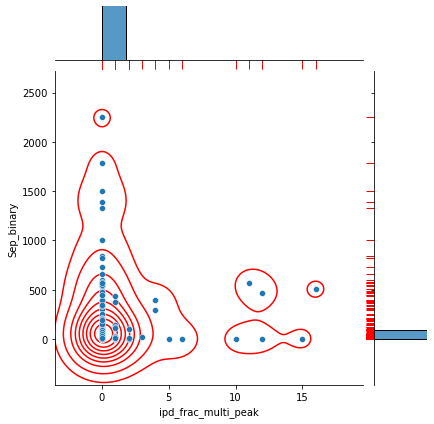

In [13]:
obj_idp1 = obj_idp[obj_idp['ipd_frac_multi_peak'] < 30]
g = sns.jointplot(x = 'ipd_frac_multi_peak', y = 'Sep_binary', data = obj_idp1) 
g.plot_joint(sns.kdeplot, color ="r",zorder = 0)
g.plot_marginals(sns.rugplot, color = 'r', height = -0.15, clip_on =False)


# IDP and isochones

In [51]:
new_objects = pd.read_csv('new_objects.csv')
strange_objects = new_objects[new_objects['Strange'] == 1]
strange_objects.drop(columns='Strange')
strange_obj = strange_objects[['SHORTNAME','DISCOVERYNAME','RA','DEC','COMPANIONS',
                            'NUMCOMPANION', 'PARALLAX','PARALLAXERR','PARALLAXREFNAME',
                            'PMRA','PMRAERR','PMDEC','PMDECERR','GAIAG','GAIARP','TMASSK',
                            'TMASSJ','ABSmag','GAIA_GR'
                            ]]
strange_obj.to_csv('strange.csv')

In [9]:
df_secondary = secondary.copy()
df_secondary = df_secondary.drop(columns= "Unnamed: 0")
df_secondary['ABSmag'] = df_secondary['GAIAG'] + (5*np.log10(df_secondary['PARALLAX']/100.))
df_secondary['GAIA_GR'] = df_secondary['GAIAG'] - df_secondary['GAIARP']

In [10]:
pri_abs = np.array(list(map(lambda x: x + 5*np.log10(x/100.) , primary['GAIAG'])))
pri_GR = np.array(list(map(lambda x,y: x-y , primary['GAIAG'], primary['GAIARP'])))
sec_abs = np.array(list(map(lambda x: x + 5*np.log10(x/100.) , secondary['GAIAG'])))
sec_GR = np.array(list(map(lambda x,y: x-y , secondary['GAIAG'], secondary['GAIARP'])))

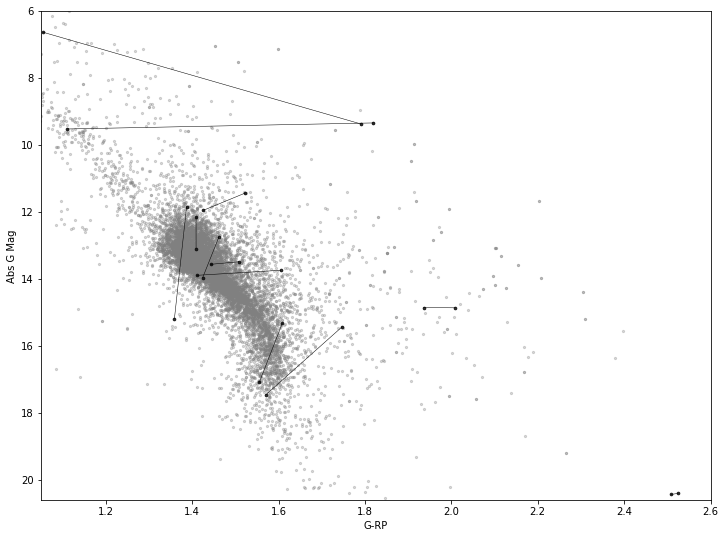

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


strange_obj = pd.read_csv("strange.csv")
fig = plt.figure(figsize=(12,9))

cone = cone[cone['GAIATOG'] > 0 ]
plt.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.3, s= 5)

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5, label = 'Binary System')
    plt.scatter(G_R,absG, color= 'black', alpha = 0.75, s = 7)



#plt.scatter(sec_GR, sec_abs, color = 'grey', alpha = 0.5, s= 5)

plt.xlabel("G-RP")
plt.ylabel("Abs G Mag")
plt.xlim(1.04, 2.6)
plt.ylim(6,20.6)
plt.gca().invert_yaxis()
plt.savefig('strange.png')
plt.show()


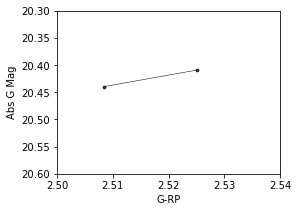

In [25]:
fig = plt.figure(figsize=(4,3))

cone = cone[cone['GAIATOG'] > 0 ]
plt.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.3, s= 5)

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5, label = 'Binary System')
    plt.scatter(G_R,absG, color= 'black', alpha = 0.75, s = 7)



#plt.scatter(sec_GR, sec_abs, color = 'grey', alpha = 0.5, s= 5)

plt.xlabel("G-RP")
plt.ylabel("Abs G Mag")
plt.xlim(2.5, 2.54)
plt.ylim(20.3,20.6)
plt.gca().invert_yaxis()
plt.savefig('zoomes.png')
plt.show()

Points from meeting: 
- Check object with idp lower than 50
- H-R diagram  with ABSG mag vs j-k colour
- Check objects in simbad
- Check for equal mass binaries 


Paper 2020MNRAS.499.5302D : 255 binaries and 6 multiple system candidates. The final results was retrived using the following link. 
http://desdr-server.ncsa.illinois.edu/despublic/other_files/y3-lt-widebinaries/pairs_gaia_ucd_des_ucd_final_catalog.fits

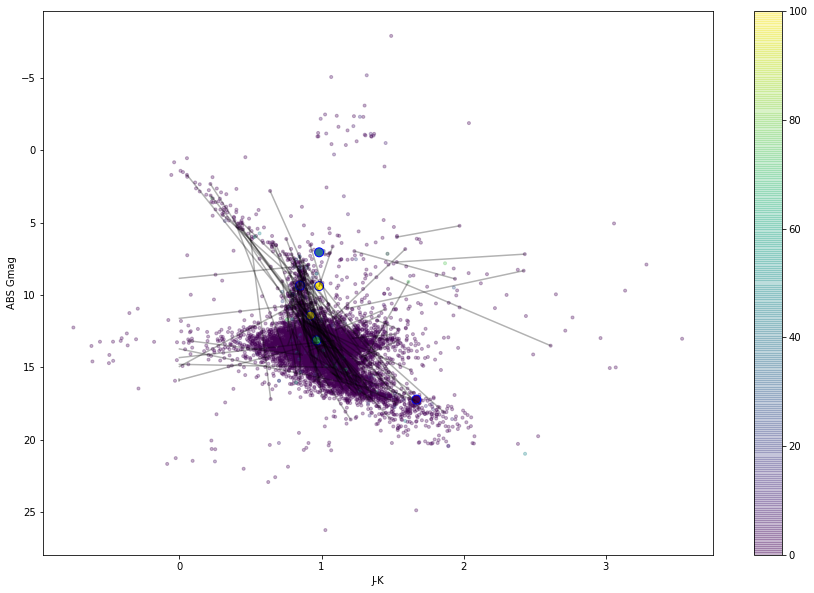

In [15]:
new_objects = new_objects[new_objects['GAIATOG'] > 0]
secondary_obj = secondary_obj[secondary_obj['GAIATOG'] > 0]

plt.figure(figsize=(15,10))
pairs = []
for i in range(len(new_objects)):
    absG =[]
    j_k = []
    sec_obj = fxn.Converttolist(new_objects.iloc[i]['COMPANIONS'])
    for j in range(len(secondary_obj)):
        if secondary_obj.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(new_objects.iloc[i]['ABSmag'])
            absG.append(secondary_obj.iloc[j]['ABSmag'])
            j_k.append(new_objects.iloc[i]['TMASSJ']-new_objects.iloc[i]['TMASSK'])
            j_k.append(secondary_obj.iloc[j]['TMASSJ']-secondary_obj.iloc[j]['TMASSK'])
    pairs.append([absG, j_k])
    plt.plot(j_k, absG, "black", alpha = 0.3)
#plt.scatter(new_objects['GAIA_GR'], new_objects['ABSmag'],  label = 'PRIMARY')
#plt.scatter(secondary_obj['GAIA_GR'], secondary_obj['ABSmag'], label = 'SECONDARY')
cone = cone[cone['TMASSJ']>0]
cone = cone[cone['TMASSK'] >0]
jk = cone["TMASSJ"]-cone["TMASSK"]
plt.scatter(jk, cone["ABSmag"], 
        alpha =0.3, marker = '.', c = cone['ipd_frac_multi_peak'])
plt.colorbar()
plt.gca().invert_yaxis()
cone_idp = cone[cone['ipd_frac_multi_peak'] > 80]
plt.scatter([cone_idp["TMASSJ"]-cone_idp["TMASSK"]] , cone_idp["ABSmag"],
        facecolor = 'none', edgecolor = "blue", s = 80, c = cone_idp['ipd_frac_multi_peak'])
plt.xlabel('J-K')
plt.ylabel('ABS Gmag')
plt.show()

In [16]:


table_255 = Table.read("http://desdr-server.ncsa.illinois.edu/despublic/other_files/y3-lt-widebinaries/old/pairs_gaia_ucd_des_ucd_J2000_2020_final.fits")
ra = [i for i in table_255['ra_star_A']]
dec = [i for i in table_255['dec_star_A']]
ra.append(0.827715)
dec.append(-10.675492)
coord = {'RA':ra, 'DEC':dec}
coordinates = pd.DataFrame.from_dict(coord)
coordinates

,RA,DEC
0,0.467230,-43.262637
1,0.540213,0.107794
2,0.601845,-6.436443
3,0.848970,-58.064060
4,1.443228,1.081674
...,...,...
255,356.820319,-0.993361
256,357.546734,-46.860835
257,358.096218,-56.697796
258,358.207941,-63.397282


In [17]:
catalogue = SkyCoord(ra = coordinates['RA']*u.deg, dec = coordinates['DEC']*u.deg )
c1 = SkyCoord(ra = new['RA']*u.deg, dec = new['DEC']*u.deg )
idx, d2d, d3d = match_coordinates_sky(c1, catalogue)

-Plot on sky 

- age, colour, AbsG
-
